


#Devoir 1 DM

##Perceptron programme



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [ ]:
class Predection_beta:
    def fit(self,X,y,n_iter=100):                     

        n_samples = X.shape[0]                                                   #nombre de ligne
        n_features = X.shape[1]                                              #nombre de colonnes 
        self.weights = np.zeros((n_features+1,))                                  #add 1 for the bias term , array 
        X = np.concatenate([X, np.ones((n_samples,1))], axis = 1)                     #add column of 1s
        for i in range(n_iter):
              for j in range(n_samples):
                    if y[j]*np.dot(self.weights, X[j,:]) <= 0:
                          self.weights+= y[j]*X[j,:]

    def predict(self, X):
        if not hasattr(self, 'weights'):                                               #The hasattr() function returns True if
            print('the model is not trained yet')                                       #the specified object has the specified 
                                                                                        #attribute, otherwise False.
            return 
        n_samples = X.shape[0]
        X = np.concatenate([X, np.ones((n_samples,1))], axis = 1)                     #add column of 1s
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val>0 else -1)(y)
        return y

    def scores(self, X, y):
            pred_y = self.predict(X)

            return np.mean(y == pred_y)                                                    


In [ ]:
class PredectionPocket:

    def fitPocket(self,X,y,n_iter = 100):                     
        n_samples = X.shape[0]                                                   #nombre de ligne
        n_features = X.shape[1]                                              #nombre de colonnes 
        self.weights = np.zeros((n_features+1,))                                  #add 1 for the bias term , array 
        X = np.concatenate([X, np.ones((n_samples,1))], axis = 1)                     #add column of 1s
        for i in range(n_iter):
            y_vec = np.dot(X, self.weights)
            y_pred = np.ones_like(y)
            y_vec_loc = np.where(y_vec < 0)[0]
            y_pred[y_vec_loc] = -1
            nb_wrong = len(np.where(y != y_pred)[0])
            if nb_wrong == 0:
                break
            else:
                wr_class = np.random.choice(nb_wrong)
                wr_class_ind = np.where(y != y_pred)[0][wr_class]
                w1 = self.weights + y[wr_class_ind] * X[wr_class_ind, :]
                y_vec = np.dot(X, w1)
                y_pred = np.ones_like(y)
                y_vec_loc = np.where(y_vec < 0)[0]
                y_pred[y_vec_loc] = -1
                nb_wrong1 = len(np.where(y != y_pred)[0])
                if nb_wrong1 <nb_wrong:
                    self.weights = w1  
    def predict(self, X):
        if not hasattr(self, 'weights'):                                               #The hasattr() function returns True if
            print('the model is not trained yet')                                       #the specified object has the specified 
                                                                                        #attribute, otherwise False.
            return 
        n_samples = X.shape[0]
        X = np.concatenate([X, np.ones((n_samples,1))], axis = 1)                     #add column of 1s
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val>0 else -1)(y)
        return y

    def scores(self, X, y):
            pred_y = self.predict(X)

            return np.mean(y == pred_y)                                                    


In [ ]:
def plot_data_points(ax, X, y):
    neg_class = (y == -1)
    pos_class = (y == 1)
    ax.scatter(X[neg_class, 0], X[neg_class, 1])
    ax.scatter(X[pos_class, 0], X[pos_class, 1])

def plot_decision_boundary(ax, clf, X, p,color='red'):
    X_cpy = X.copy()
    margin = 0.5
    x_min = np.min(X_cpy[:, 0])-margin
    x_max = np.max(X_cpy[:, 0])+margin
    y_min = np.min(X_cpy[:, 1])-margin
    y_max = np.max(X_cpy[:, 1])+margin
    n = 1000
    x = np.linspace(x_min, x_max, num=n)
    y = np.linspace(y_min, y_max, num=n)
    x, y = np.meshgrid(x, y)
    X_cpy = np.stack([x.reshape((n*n,)), y.reshape((n*n,))], axis=1)
    X_cpy = polynomial_features(X_cpy, p)
    z = clf.predict(X_cpy)
    z = z.reshape((n, n))
    ax.contour(x, y, z, levels=[0],colors=color)

def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X: np.ndarray, p) -> np.ndarray:
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)


In [ ]:
X,y = make_classification(                                                                    #creation des donnees
     n_features=2,
     n_classes=2,
     n_samples=1000,
     n_redundant=0,
     n_clusters_per_class=1
)
y=np.where(y==0, -1, y) # cleaning data

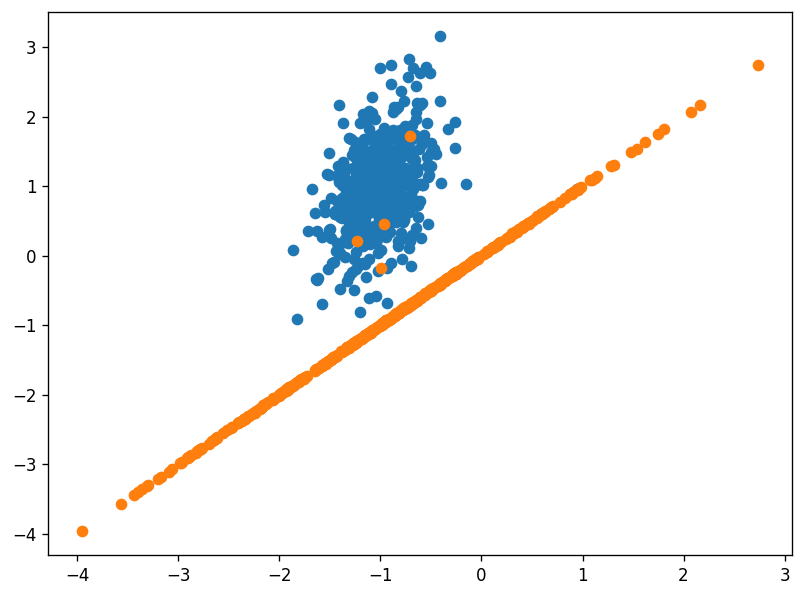

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
#plt.savefig('notredata2.png')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
perceptron = Predection_beta()
perceptron.fit(X_train, y_train)
pre= perceptron.predict(X_test)
print( str(perceptron.scores(X_test, y_test)*100) + ' % accuracy')

98.5 % accuracy


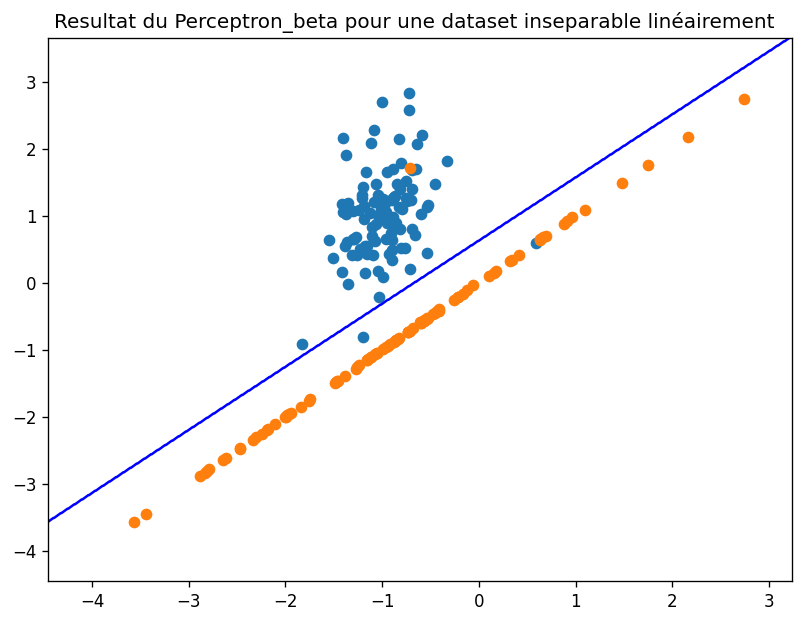

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X_test, y_test)
plot_decision_boundary(ax, perceptron, X, 1,'Blue')
plt.title("Resultat du Perceptron_beta pour une dataset inseparable linéairement  ")
#plt.savefig('figure1.png')
plt.show()

In [ ]:
perceptron2 = PredectionPocket()
perceptron2.fitPocket(X_train, y_train)
pre= perceptron2.predict(X_test)
print( str(perceptron2.scores(X_test, y_test)*100) + ' % accuracy')

92.0 % accuracy


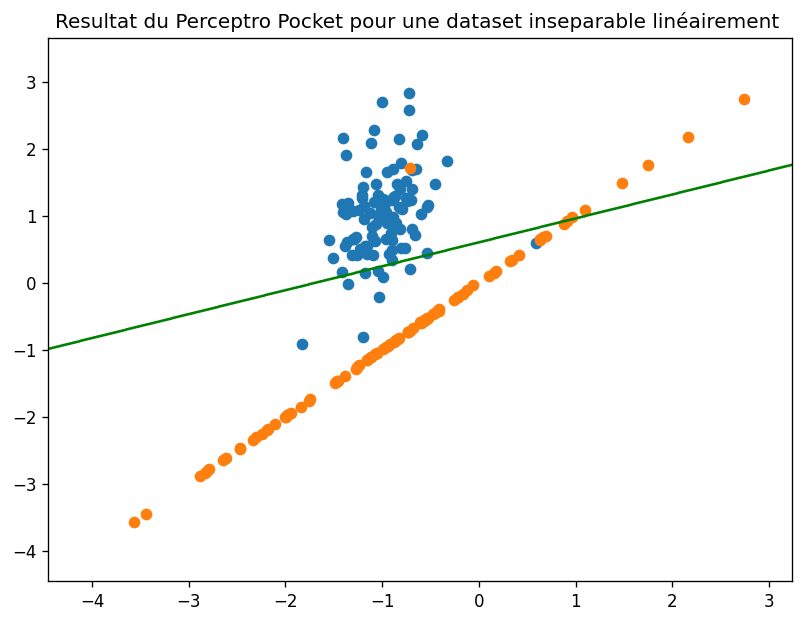

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X_test, y_test)
plot_decision_boundary(ax, perceptron2, X, 1,'Green')
plt.title("Resultat du Perceptro Pocket pour une dataset inseparable linéairement ")
plt.savefig('figure2.png')
plt.show()

In [ ]:
perceptron3 = Perceptron() # Scikit-learn Perceptron
perceptron3.fit(X_train, y_train)
pre= perceptron3.predict(X_test)
print( str(perceptron3.score(X_test, y_test)*100) + ' % accuracy')

97.5 % accuracy


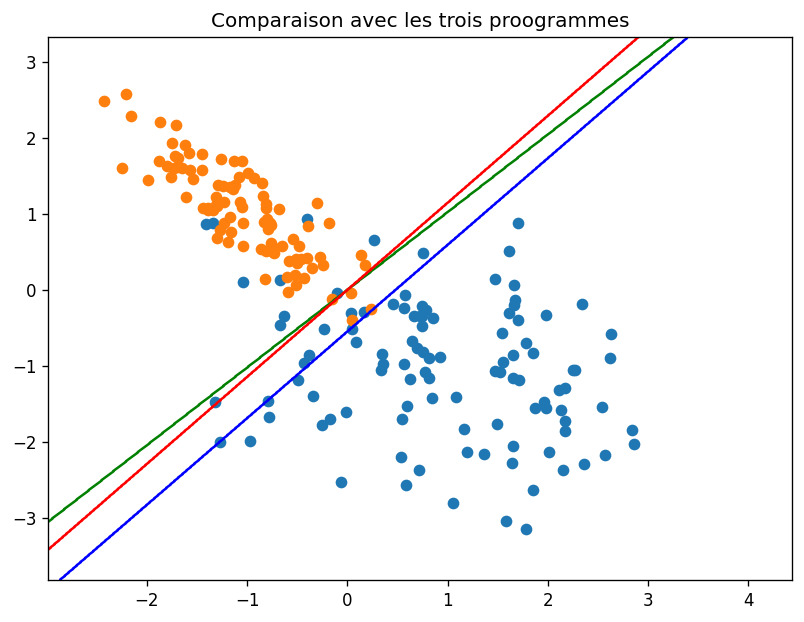

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X_test, y_test)
plot_decision_boundary(ax, perceptron2, X, 1,'Green')
plot_decision_boundary(ax, perceptron, X, 1,'Blue')
plot_decision_boundary(ax, perceptron3, X, 1,'red')

plt.title("Comparaison avec les trois proogrammes")
#plt.savefig('figure3.png')
plt.show()